# Mario Soto

In [14]:
!unzip HW2_Files.zip

Archive:  HW2_Files.zip
  inflating: data.csv                
  inflating: __MACOSX/._data.csv     
   creating: Speeches/
  inflating: __MACOSX/._Speeches     
  inflating: Speeches/FayettevilleSep9_2019.txt  
  inflating: __MACOSX/Speeches/._FayettevilleSep9_2019.txt  
  inflating: Speeches/TupeloNov1_2019.txt  
  inflating: __MACOSX/Speeches/._TupeloNov1_2019.txt  
  inflating: Speeches/NewHampshireAug15_2019.txt  
  inflating: __MACOSX/Speeches/._NewHampshireAug15_2019.txt  
  inflating: Speeches/HendersonSep13_2020.txt  
  inflating: __MACOSX/Speeches/._HendersonSep13_2020.txt  
  inflating: Speeches/OhioSep21_2020.txt  
  inflating: __MACOSX/Speeches/._OhioSep21_2020.txt  
  inflating: Speeches/PhoenixFeb19_2020.txt  
  inflating: __MACOSX/Speeches/._PhoenixFeb19_2020.txt  
  inflating: Speeches/BattleCreekDec19_2019.txt  
  inflating: __MACOSX/Speeches/._BattleCreekDec19_2019.txt  
  inflating: Speeches/PittsburghSep22_2020.txt  
  inflating: __MACOSX/Speeches/._PittsburghSep22_

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df = pd.DataFrame(data)

# Filling missing values in the 'price' column with a constant value using SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=99.0)
df['price'] = imputer.fit_transform(df[['price']])

print(df)


  size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN   99.0   300.0    yes
3  NaN  green  female  129.0     NaN     no
4    M    red  female   79.0   410.0    yes
5    M  green    male   89.0     NaN     no


In [2]:
df = pd.DataFrame(data)

# Filling missing values in the 'size' column with the most frequent value using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['size'] = imputer.fit_transform(df[['size']])

print(df)

  size  color  gender  price  weight bought
0   XL    red  female  199.0   500.0    yes
1    L  green    male   89.0   450.0     no
2    M   blue     NaN    NaN   300.0    yes
3    M  green  female  129.0     NaN     no
4    M    red  female   79.0   410.0    yes
5    M  green    male   89.0     NaN     no


In [3]:
import pandas as pd

data = {
    'weight': [75.0, 78.5, 85.0, 91.0, 84.5, 83.0, 68.0],
    'weight_cut': ['light', 'normal', 'heavy', 'heavy', 'heavy', 'heavy', 'light']
}

df = pd.DataFrame(data)

# Convert weight_cut categorical column into dummy variables
dummy_df = pd.get_dummies(df['weight_cut'], prefix='weight_cut')

# Concatenate dummy variables with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

# Drop the original weight_cut column
df.drop(columns=['weight_cut'], inplace=True)

print(df)


   weight  weight_cut_heavy  weight_cut_light  weight_cut_normal
0    75.0                 0                 1                  0
1    78.5                 0                 0                  1
2    85.0                 1                 0                  0
3    91.0                 1                 0                  0
4    84.5                 1                 0                  0
5    83.0                 1                 0                  0
6    68.0                 0                 1                  0


In [4]:
import pandas as pd

data = {
    'currency': [['PLN', 'USD'],
                 ['EUR', 'USD', 'PLN', 'CAD'],
                 ['GBP'],
                 ['JPY', 'CZK', 'HUF'],
                 []]
}

df = pd.DataFrame(data)

# Assign a new column 'number' that takes the number of items in the currency column
df['number'] = df['currency'].apply(lambda x: len(x))

print(df)


               currency  number
0            [PLN, USD]       2
1  [EUR, USD, PLN, CAD]       4
2                 [GBP]       1
3       [JPY, CZK, HUF]       3
4                    []       0


In [5]:
df = pd.DataFrame(data)

# Assign a new column 'PLN_flag' which stores 1 when 'PLN' is in the currency column, otherwise 0
df['PLN_flag'] = df['currency'].apply(lambda x: 1 if 'PLN' in x else 0)

print(df)

               currency  PLN_flag
0            [PLN, USD]         1
1  [EUR, USD, PLN, CAD]         1
2                 [GBP]         0
3       [JPY, CZK, HUF]         0
4                    []         0


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data from CSV file into a DataFrame
df = pd.read_csv('data.csv')

# Drop any non-numeric columns if needed
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_numeric)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_numeric.columns)

print(df_scaled)


         var1      var2      var3      var4      var5
0   -0.478538 -0.213717 -0.458355 -0.511380  0.063571
1    1.374244  0.389500  1.292399  1.405497 -0.615974
2    0.377694 -0.017838  0.390458  0.278322  0.742405
3   -0.498584 -0.418499 -0.442705 -0.553083  0.472293
4   -0.744858 -1.139688 -0.723583 -0.745037  0.077077
..        ...       ...       ...       ...       ...
138  0.142874 -0.961617  0.146234 -0.008573  1.026734
139  0.088465  0.146878  0.093518 -0.035784 -0.002535
140 -0.888040 -0.607700 -0.877201 -0.832880  0.635782
141  1.623382  0.576475  1.555979  1.789996 -0.031679
142 -1.111405 -1.633836 -1.090125 -0.985497  0.085607

[143 rows x 5 columns]


In [231]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load X_train.csv and X_test.csv into DataFrames
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the scaler fitted on X_train
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the first five rows of X_train_scaled_df and X_test_scaled_df
print("First five rows of X_train:")
print(X_train_scaled_df.head())

print("\nFirst five rows of X_test:")
print(X_test_scaled_df.head())


First five rows of X_train:
       var1      var2      var3      var4      var5
0 -0.349138 -1.438513 -0.411726 -0.390479 -1.863662
1 -0.204687  0.312640 -0.133673 -0.275880  1.078073
2 -0.329312 -0.215072 -0.317394 -0.364357 -1.579880
3  1.027403  2.089824  1.046922  0.917584  0.316303
4  1.828969  0.696001  1.763681  1.783821 -0.333674

First five rows of X_test:
       var1      var2      var3      var4      var5
0 -0.468099 -0.141713 -0.444680 -0.485979  0.293371
1  1.364457  0.499588  1.306438  1.334411 -0.391720
2  0.378785  0.066532  0.404309  0.263973  0.977745
3 -0.487926 -0.359424 -0.429027 -0.525583  0.705429
4 -0.731511 -1.126145 -0.709964 -0.707875  0.306987


In [341]:
import os
import pandas as pd
import re  # Add this import statement for regular expressions

# List all files in the Speeches folder
files = os.listdir('Speeches')

# Create an empty DataFrame
speech_df = pd.DataFrame(columns=['FileName', 'Content'])

# Read the content of each file and append it to the DataFrame
for file in files:
    with open('Speeches/' + file, 'r') as f:
        content = f.read()
        speech_df = pd.concat([speech_df, pd.DataFrame({'FileName': [file], 'Content': [content]})], ignore_index=True)

# Display the first few rows of the speech_df DataFrame
print(speech_df.head())


                     FileName  \
0      FreelandSep10_2020.txt   
1        LatrobeSep3_2020.txt   
2       BemidjiSep18_2020.txt   
3  NewHampshireFeb10_2020.txt   
4      LasVegasFeb21_2020.txt   

                                             Content  
0  We brought you a lot of car plants, Michigan. ...  
1  So thank you Pennsylvania, very much. I'm thri...  
2  There's a lot of people. That's great. Thank y...  
3  Hello, Manchester, and I am thrilled to be in ...  
4  Well, thank you very much. And hello Las Vegas...  


In [342]:
# Step 2 - Extract City, Date, Day, Month, and Year
# Define regex patterns
date_pattern = r'(\w{3})(\d{1,2})_(\d{4})'
city_pattern = r'([A-Za-z]+)'

month_map = {
    'Jan': '1',
    'Feb': '2',
    'Mar': '3',
    'Apr': '4',
    'May': '5',
    'Jun': '6',
    'Jul': '7',
    'Aug': '8',
    'Sep': '9',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Extracting City, Date, Day, Month, and Year
speech_df['City'] = speech_df['FileName'].apply(lambda x: re.search(city_pattern, x).group(1) if re.search(city_pattern, x) else None)
speech_df['Date'] = speech_df['FileName'].apply(lambda x: re.search(date_pattern, x).group(1) + re.search(date_pattern, x).group(2) + re.search(date_pattern, x).group(3) if re.search(date_pattern, x) else None)
speech_df['Day'] = speech_df['FileName'].apply(lambda x: re.search(date_pattern, x).group(2) if re.search(date_pattern, x) else None)
speech_df['Month'] = speech_df['FileName'].apply(lambda x: re.search(date_pattern, x).group(1) if re.search(date_pattern, x) else None)
speech_df['Year'] = speech_df['FileName'].apply(lambda x: re.search(date_pattern, x).group(3) if re.search(date_pattern, x) else None)

# Convert Date to YYYY-MM-DD format
speech_df['Date'] = pd.to_datetime(speech_df['Date'], format='%b%d%Y').dt.strftime('%Y-%m-%d')

# Convert Month to numerical values
speech_df['Month'] = speech_df['Month'].map(month_map)

# Remove month abbreviations from City names
speech_df['City'] = speech_df['City'].apply(lambda x: re.sub(r'(Feb|Oct|Aug|Dec|Jan|Jul|Mar|Sep)', '', x))

# Drop the FileName column
speech_df.drop(columns=['FileName'], inplace=True)

# Display the DataFrame
print(speech_df)

                                              Content              City  \
0   We brought you a lot of car plants, Michigan. ...          Freeland   
1   So thank you Pennsylvania, very much. I'm thri...           Latrobe   
2   There's a lot of people. That's great. Thank y...           Bemidji   
3   Hello, Manchester, and I am thrilled to be in ...      NewHampshire   
4   Well, thank you very much. And hello Las Vegas...          LasVegas   
5   What a crowd, what a crowd. Get those people o...      Fayetteville   
6    Thank you very much, Phoenix. We love to be b...           Phoenix   
7   Thank you, thank you. Wow. Wow, and I'm thrill...         Henderson   
8   Hello, Houston. I am so thrilled to be here in...             Texas   
9   Thank you very much. Thank you, Minnesota. Thi...       Minneapolis   
10   Thank you everybody. Thank you and Vice Presi...      Fayetteville   
11   Well, thank you to Vice President Pence. Than...           Hershey   
12   Thank you very much 

In [344]:
# List of words to track
words_to_track = ['vote', 'tax', 'campaign', 'economy']

# Function to calculate ratio of appearance for each word in each document
def calculate_ratio(content):
    words = content.lower().split()  # Split content into words
    total_words = len(words)
    ratios = []
    for word in words_to_track:
        word_count = words.count(word)
        ratio = word_count / total_words if total_words > 0 else 0
        ratios.append(ratio)
    return ratios

# Create new columns with ratios for each word
ratios_df = speech_df['Content'].apply(calculate_ratio).apply(pd.Series)
ratios_df.columns = ['vote_ratio', 'tax_ratio', 'campaign_ratio', 'economy_ratio']

# Concatenate ratios_df with original speech_df
speech_df = pd.concat([speech_df, ratios_df], axis=1)

# Display the updated DataFrame
print(speech_df)


                                              Content              City  \
0   We brought you a lot of car plants, Michigan. ...          Freeland   
1   So thank you Pennsylvania, very much. I'm thri...           Latrobe   
2   There's a lot of people. That's great. Thank y...           Bemidji   
3   Hello, Manchester, and I am thrilled to be in ...      NewHampshire   
4   Well, thank you very much. And hello Las Vegas...          LasVegas   
5   What a crowd, what a crowd. Get those people o...      Fayetteville   
6    Thank you very much, Phoenix. We love to be b...           Phoenix   
7   Thank you, thank you. Wow. Wow, and I'm thrill...         Henderson   
8   Hello, Houston. I am so thrilled to be here in...             Texas   
9   Thank you very much. Thank you, Minnesota. Thi...       Minneapolis   
10   Thank you everybody. Thank you and Vice Presi...      Fayetteville   
11   Well, thank you to Vice President Pence. Than...           Hershey   
12   Thank you very much 

In [350]:
# Convert Month and Year columns to numeric type
speech_df['Month'] = pd.to_numeric(speech_df['Month'])
speech_df['Year'] = pd.to_numeric(speech_df['Year'])

# Group by Year and Month, then calculate mean
grouped_df = speech_df.groupby(['Year', 'Month']).mean()

# Create the vis_df DataFrame with the desired format
vis_df = pd.DataFrame(index=grouped_df.index)
vis_df['Y_M'] = grouped_df.index.map(lambda x: f"{x[0]}_{x[1]}")
vis_df['r_vote'] = grouped_df['vote_ratio']
vis_df['r_tax'] = grouped_df['tax_ratio']
vis_df['r_campaign'] = grouped_df['campaign_ratio']
vis_df['r_economy'] = grouped_df['economy_ratio']

# Reset index to make Y_M a regular column
vis_df.reset_index(drop=True, inplace=True)

# Display the vis_df DataFrame
print(vis_df)


        Y_M    r_vote     r_tax  r_campaign  r_economy
0    2019_7  0.000566  0.000189    0.000283   0.000660
1    2019_8  0.000811  0.000282    0.001069   0.000172
2    2019_9  0.000573  0.000859    0.000351   0.000442
3   2019_10  0.000229  0.000190    0.000624   0.000224
4   2019_11  0.000940  0.000220    0.000333   0.000277
5   2019_12  0.000344  0.000209    0.000079   0.000242
6    2020_1  0.000424  0.000570    0.000151   0.000155
7    2020_2  0.000390  0.000182    0.000134   0.000186
8    2020_3  0.000300  0.000600    0.000150   0.000450
9    2020_6  0.000445  0.000178    0.000178   0.000089
10   2020_8  0.001228  0.000484    0.000214   0.000222
11   2020_9  0.000435  0.000185    0.000097   0.000227


<ipython-input-350-f038b513d153>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = speech_df.groupby(['Year', 'Month']).mean()


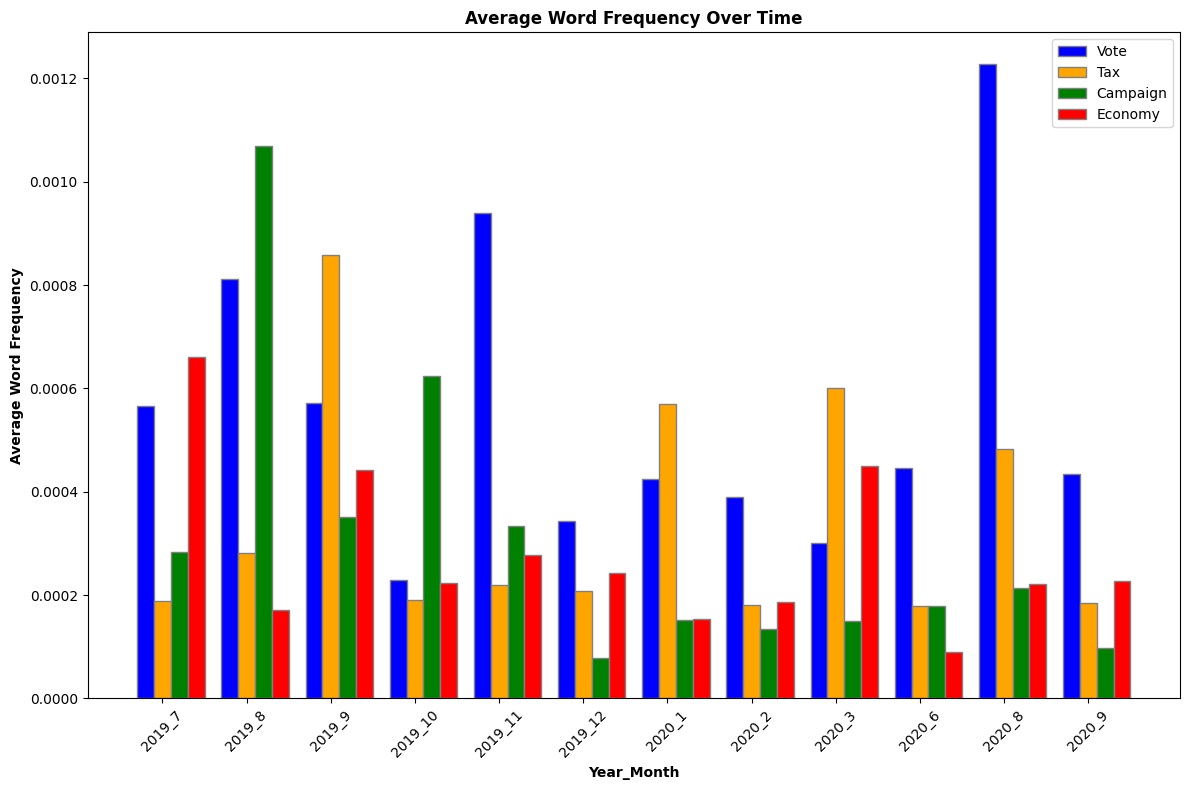

In [353]:
import numpy as np

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(vis_df['Y_M']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.figure(figsize=(12, 8))
plt.bar(r1, vis_df['r_vote'], color='b', width=bar_width, edgecolor='grey', label='Vote')
plt.bar(r2, vis_df['r_tax'], color='orange', width=bar_width, edgecolor='grey', label='Tax')
plt.bar(r3, vis_df['r_campaign'], color='g', width=bar_width, edgecolor='grey', label='Campaign')
plt.bar(r4, vis_df['r_economy'], color='r', width=bar_width, edgecolor='grey', label='Economy')

# Add xticks on the middle of the group bars
plt.xlabel('Year_Month', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(vis_df['Y_M']))], vis_df['Y_M'], rotation=45)

# Add y label
plt.ylabel('Average Word Frequency', fontweight='bold')

# Add title
plt.title('Average Word Frequency Over Time', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()
